# Locating regions of high density via DBSCAN

1. Density-based Spatial Clustering of Applications with Noise (DBSCAN), which does not make assumptions about spherical clusters like k-means, nor does it partition the dataset into hierarchies that require a manual cut-off point. As its name implies, densitybased clustering assigns cluster labels based on dense regions of points. In DBSCAN, the notion of density is defined as the number of points within a specified radius .
2. According to the DBSCAN algorithm, a special label is assigned to each sample(point) using the following criteria:

 -> A point is considered a core point if at least a specified number    (MinPts) of neighboring points fall within the specified radius
 
 -> A border point is a point that has fewer neighbors than MinPts within , but lies within the radius of a core point
 
 -> All other points that are neither core nor border points are considered noise points

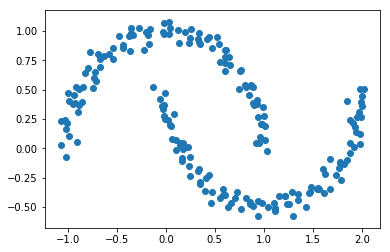

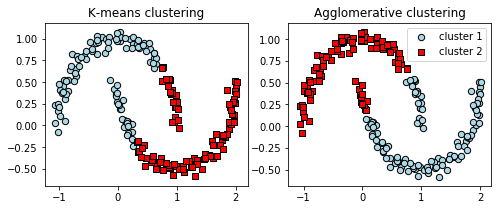

In [3]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

X, y = make_moons(n_samples=200,noise=0.05,random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters=2,random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0,0],
    X[y_km==0,1],
    c='lightblue',
    edgecolor='black',
    marker='o',
    s=40,
    label='cluster 1')
ax1.scatter(X[y_km==1,0],
    X[y_km==1,1],
    c='red',
    edgecolor='black',
    marker='s',
    s=40,
    label='cluster 2')
ax1.set_title('K-means clustering')
ac = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0],X[y_ac==0,1],c='lightblue',edgecolor='black',marker='o',s=40,label='cluster 1')
ax2.scatter(X[y_ac==1,0],X[y_ac==1,1],c='red',edgecolor='black',marker='s',s=40,label='cluster 2')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.show()

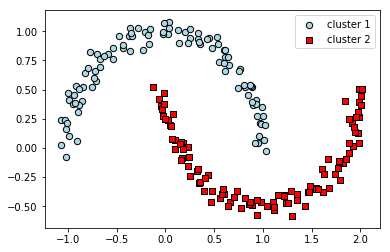

In [4]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,min_samples=5,metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db==0,0],X[y_db==0,1],c='lightblue',edgecolor='black',marker='o',s=40,label='cluster 1')
plt.scatter(X[y_db==1,0],X[y_db==1,1],c='red',edgecolor='black',marker='s',s=40,label='cluster 2')
plt.legend()
plt.show()